In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving card_public_data.xlsx to card_public_data.xlsx


In [ ]:
!pip install shap

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib import pyplot as pt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import io

In [ ]:
data_set = pd.read_excel(io.BytesIO(uploaded['card_public_data.xlsx']))
data_set.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,10000,1,2,2,45,-1,-1,0,0,0,0,492,9017,9787,9897,9707,-173,10300,1000,500,200,0,10200,0
1,60000,2,2,2,26,0,0,0,0,0,0,56146,56929,55009,30181,41528,21069,2314,1459,914,1900,800,932,0
2,70000,2,1,2,34,2,2,2,2,2,2,43357,44347,43357,46626,47562,48651,2000,0,4000,2000,2000,2000,1
3,170000,2,1,1,35,-1,-1,-1,-1,-1,-1,736,316,1970,1132,1132,1397,1289,1970,1132,1132,1397,1397,0
4,80000,2,2,2,26,0,0,0,2,0,0,77037,71799,75743,67626,69081,70772,3300,5800,0,2700,3000,2700,0


In [ ]:
data_set = data_set.rename(columns = {'default payment next month': 'def_next_month'})

In [ ]:
fraud = data.loc[data['def_next_month']==1]
non_fraud = data.loc[data['is_frdef_next_month']==0]

In [ ]:
#@title Assignment-1 { form-width: "30%" }
data_set['SEX'].replace(2,'Female',inplace=True)
data_set['SEX'].replace(1,'Male',inplace=True)

data_set['def_next_month'].replace(1,'Yes',inplace=True)
data_set['def_next_month'].replace(0,'No',inplace=True)

data_set.EDUCATION.unique()

array(['Univ', 'Grad', 'high_sch', 'others'], dtype=object)

In [ ]:
#@title Ass1 { form-width: "5%" }
data_set['EDUCATION'].replace(1,'Grad',inplace=True)
data_set['EDUCATION'].replace(2,'Univ',inplace=True)
data_set['EDUCATION'].replace(3,'high_sch',inplace=True)
data_set['EDUCATION'].replace(4,'others',inplace=True)
data_set['EDUCATION'].replace(5,'others',inplace=True)
data_set['EDUCATION'].replace(6,'others',inplace=True)
data_set['EDUCATION'].replace(0,'others',inplace=True)

data_set.EDUCATION

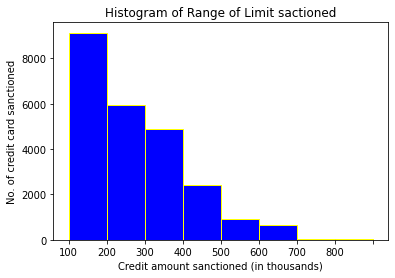

In [ ]:
#@title Assignment-1 { form-width: "5%" }
#Exploratory Data Analysis 1 

fig,ax = pt.subplots(1,1)
mark = data_set.LIMIT_BAL
ax.hist(mark, bins = [0,100000,200000,300000,400000,500000,600000,700000,800000],edgecolor="yellow", color="blue")
ax.set_xticklabels(['0','100','200','300','400','500','600','700','800'])
ax.set_title("Histogram of Range of Limit sactioned")
ax.set_xlabel("Credit amount sanctioned (in thousands)")
ax.set_ylabel('No. of credit card sanctioned')
pt.show()

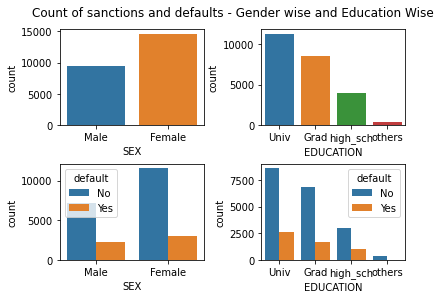

In [ ]:
fig, axes = pt.subplots(nrows=2, ncols=2)
#fig.tight_layout()

pt.suptitle('Count of sanctions and defaults - Gender wise and Education Wise')
x = data_set.SEX
pt.subplot(2,2,1)
sns.countplot(x=x, data=data_set)
#ax1 = fig.add_subplot(ax[1:, 0:2])

x = data_set.EDUCATION
pt.subplot(2,2,2)
sns.countplot(x=x, data=data_set)

x = data_set.SEX
y = data_set.def_next_month
pt.subplot(2,2,3)
sns.countplot(x=x,hue=y,data=data_set)
pt.legend(loc='upper left', title='default')

x = data_set.EDUCATION
y = data_set.def_next_month
pt.subplot(2,2,4)
sns.countplot(x=x, hue=y, data=data_set)
pt.legend(loc='upper right', title='default')

pt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

pt.show()

In [ ]:
data_set.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'def_next_month'],
      dtype='object')

In [ ]:
data_set['LIMIT_trans'] = 1/data_set['LIMIT_BAL']

In [ ]:
data_set['LIMIT_trans'].skew()

2.7988723317655424

In [ ]:
ohe = OneHotEncoder()
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(data_set[['SEX']]).toarray())
enc_df
data_set = data_set.join(enc_df)

In [ ]:
# assigning meaningful column names to encoded SEX column
data_set = data_set.rename(columns={0: 'Male', 1: 'Female'})

In [ ]:
data_set['MARRIAGE'].replace({0: 3}, inplace = True)

In [ ]:
ohe = OneHotEncoder()
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(data_set[['MARRIAGE']]).toarray())
enc_df
data_set = data_set.join(enc_df)

In [ ]:
#Assingning meaningful column names 
data_set = data_set.rename(columns={0:'Married', 1:'Single', 2:'Others', 3:'Others'})

In [ ]:
data_set['EDUCATION'].replace({0:4, 5:4, 6:4}, inplace = True)

In [ ]:
track_data = pd.DataFrame(data_set.loc[:,['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']])
track_data.head()

In [ ]:
#Calculating mode across all PAY columns to track his payment dicipline
payment_behaviour = track_data.mode(axis='columns', numeric_only=True)
payment_behaviour[0].replace({-2:0}, inplace = True)
payment_behaviour.head(5)

In [ ]:
df = [data_set, payment_behaviour]
data_set = pd.concat(df, axis=1)

In [ ]:
data_set = data_set.rename(columns = {0: 'Payment_behaviour'})

In [ ]:
# Just renaming Bill amt1 and not tranforming it in any way because we are going to predict the default for this bill amount
data_set = data_set.rename(columns = {'BILL_AMT1':'Next_month_Bill'})

In [ ]:
data_set['billamt_mean'] = (data_set['BILL_AMT2'] + data_set['BILL_AMT3'] + data_set['BILL_AMT4'] + data_set['BILL_AMT5'] + data_set['BILL_AMT6'])/5

In [ ]:
#I have created this attribute from analysing that some customers are paying more or less than actual bil amount
#Customers who are paying more -> will have adv amount paid for next month usage
#Customers who paid less -> have to pay additionally with the next month bill
#have created this feature for this 90 day period and previous day period

data_set['due_adv'] = data_set['PAY_AMT1'] - data_set['BILL_AMT2']
data_set['due_adv_last90'] = data_set['PAY_AMT4'] - data_set['BILL_AMT5']

In [ ]:
data_set.columns

In [ ]:
data_set['LIMIT_BAL'] = np.where((data_set['LIMIT_BAL']<=50000), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>50000)&(data_set['LIMIT_BAL']<=100000)), 2, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>100000)&(data_set['LIMIT_BAL']<=200000)), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>200000)&(data_set['LIMIT_BAL']<=300000)), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>300000)&(data_set['LIMIT_BAL']<=500000)), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>500000)&(data_set['LIMIT_BAL']<=700000)), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where(((data_set['LIMIT_BAL']>700000)&(data_set['LIMIT_BAL']<=800000)), 1, data_set['LIMIT_BAL'])
data_set['LIMIT_BAL'] = np.where((data_set['LIMIT_BAL']>800000), 1, data_set['LIMIT_BAL'])

In [ ]:
data_set.columns

Index([        'LIMIT_BAL',               'SEX',         'EDUCATION',
                'MARRIAGE',               'AGE',             'PAY_0',
                   'PAY_2',             'PAY_3',             'PAY_4',
                   'PAY_5',             'PAY_6',   'Next_month_Bill',
               'BILL_AMT2',         'BILL_AMT3',         'BILL_AMT4',
               'BILL_AMT5',         'BILL_AMT6',          'PAY_AMT1',
                'PAY_AMT2',          'PAY_AMT3',          'PAY_AMT4',
                'PAY_AMT5',          'PAY_AMT6',    'def_next_month',
             'LIMIT_trans',              'Male',            'Female',
                 'Married',            'Single',            'Others',
       'Payment_behaviour',                   1,                   2,
                         3,                   4,                   5,
            'billamt_mean',           'due_adv',    'due_adv_last90'],
      dtype='object')

In [ ]:
data_set.drop(labels=['Female','Single','Others','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',1,2,3,4,5,'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1, inplace=True)

In [ ]:
data_set['def_next_month']

In [ ]:
data_set.columns

In [ ]:
Y = data_set['def_next_month']
X = data_set
X.drop(columns=['def_next_month'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16800, 11) (7200, 11) (16800,) (7200,)


In [ ]:
X_train.head(5)

,LIMIT_BAL,EDUCATION,AGE,Next_month_Bill,LIMIT_trans,Male,Married,Payment_behaviour,billamt_mean,due_adv,due_adv_last90
13903,1,1,36,15401,0.000002,1.0,0.0,-1.0,58955.4,96,55
6740,1,1,32,73618,0.000006,0.0,0.0,2.0,81167.4,-72490,-81239
16105,1,3,45,0,0.000007,0.0,1.0,0.0,2128.0,0,0
9117,1,1,29,1430,0.000006,1.0,0.0,-1.0,2324.0,0,0
15493,1,3,45,59885,0.000007,0.0,1.0,0.0,60321.4,-56854,-58494


# Aggregate encoding bases on statistical properties

X_train

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['billamt_mean'].agg(['mean']).rename({'mean':'cust_bill_mean'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['cust_bill_mean']

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['billamt_mean'].agg(['std']).rename({'std':'cust_bill_std'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['cust_bill_std']

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['due_adv'].agg(['mean']).rename({'mean':'due_adv_mean'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['due_adv_mean']

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['due_adv'].agg(['std']).rename({'std':'due_adv_std'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['due_adv_std']

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['due_adv_last90'].agg(['mean']).rename({'mean':'due_adv_last90_mean'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['due_adv_last90_mean']

In [ ]:
temp = X_train.groupby('LIMIT_BAL')['due_adv_last90'].agg(['std']).rename({'std':'due_adv_last90_std'}, axis=1)
X_train = pd.merge(X_train,temp,on='LIMIT_BAL',how='left')
X_train['due_adv_last90_std']

X_test

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['billamt_mean'].agg(['mean']).rename({'mean':'cust_bill_mean'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['cust_bill_mean']

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['billamt_mean'].agg(['std']).rename({'std':'cust_bill_std'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['cust_bill_std']

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['due_adv'].agg(['mean']).rename({'mean':'due_adv_mean'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['due_adv_mean']

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['due_adv'].agg(['std']).rename({'std':'due_adv_std'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['due_adv_std']

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['due_adv_last90'].agg(['mean']).rename({'mean':'due_adv_last90_mean'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['due_adv_last90_mean']

In [ ]:
temp = X_test.groupby('LIMIT_BAL')['due_adv_last90'].agg(['std']).rename({'std':'due_adv_last90_std'}, axis=1)
X_test = pd.merge(X_test,temp,on='LIMIT_BAL',how='left')
X_test['due_adv_last90_std']

In [ ]:
X_train.head(5)

In [ ]:
# X_train['billamt_mean'] = (X_train['billamt_mean'] - X_train['billamt_mean'].min())/(X_train['billamt_mean'].max()-X_train['billamt_mean'].min())
# X_train['due_adv'] = (X_train['due_adv'] - X_train['due_adv'].min())/(X_train['due_adv'].max()-X_train['due_adv'].min())
# X_train['due_adv_last90'] = (X_train['due_adv_last90'] - X_train['due_adv_last90'].min())/(X_train['due_adv_last90'].max()-X_train['due_adv_last90'].min())
# X_train['cust_bill_mean'] = (X_train['cust_bill_mean'] - X_train['cust_bill_mean'].min())/(X_train['cust_bill_mean'].max()-X_train['cust_bill_mean'].min())
# X_train['due_adv_mean'] = (X_train['due_adv_mean'] - X_train['due_adv_mean'].min())/(X_train['due_adv_last90'].max()-X_train['due_adv_last90'].min())
# X_train['due_adv_last90'] = (X_train['due_adv_last90'] - X_train['due_adv_last90'].min())/(X_train['due_adv_last90'].max()-X_train['due_adv_last90'].min())
# X_train['due_adv_last90'] = (X_train['due_adv_last90'] - X_train['due_adv_last90'].min())/(X_train['due_adv_last90'].max()-X_train['due_adv_last90'].min())
# X_train['due_adv_last90'] = (X_train['due_adv_last90'] - X_train['due_adv_last90'].min())/(X_train['due_adv_last90'].max()-X_train['due_adv_last90'].min())


In [ ]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

In [ ]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [ ]:
X_train_normalized.head(10)

In [ ]:
X_test_normalized.head(10)

In [ ]:
xgb_instance = xgb.XGBClassifier() 

model_for_feature_selection = xgb_instance.fit(X_train_normalized, y_train)

In [ ]:
# check the importances - you can also use SHAP values
feature_importance = {'Feature':X_train_normalized.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

In [ ]:
shap.initjs()

In [ ]:
shap_values = shap.TreeExplainer(xgb_instance, feature_perturbation='interventional').shap_values(X_train_normalized)

In [ ]:
explainer = shap.TreeExplainer(xgb_instance)
shap_values = explainer.shap_values(X_train_normalized)

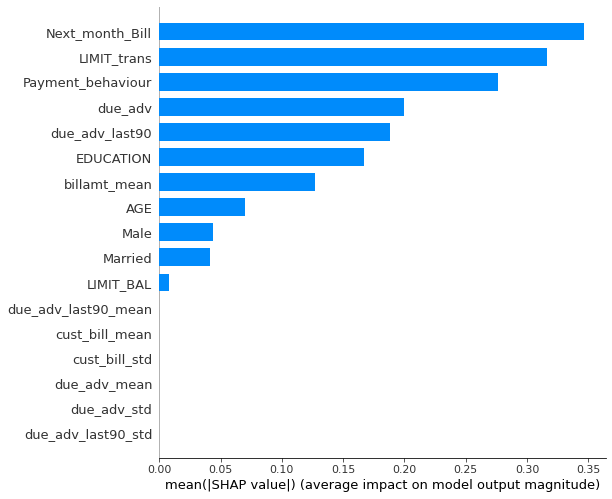

In [ ]:
shap_values = shap.TreeExplainer(xgb_instance).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

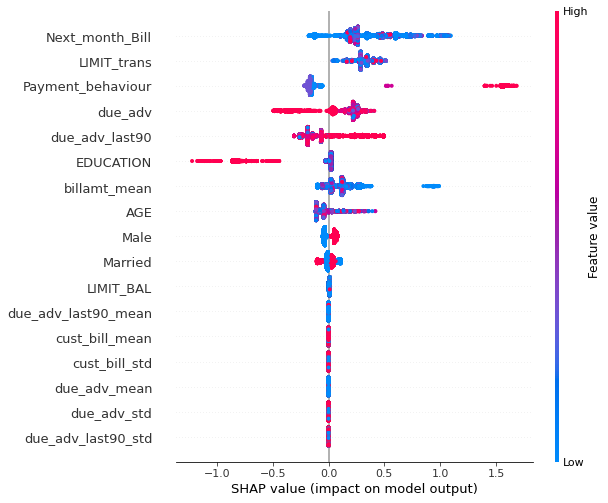

In [ ]:
shap.summary_plot(shap_values, X_train)

# LOGISTIC REGRESSION

In [ ]:
lr_model = LogisticRegression()
reult = lr_model.fit(X_train_normalized, y_train)

In [ ]:
y_pred = lr_model.predict(X_test_normalized)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_pred_proba = lr_model.predict_proba(X_test_normalized)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5589
           1       0.65      0.17      0.27      1611

    accuracy                           0.79      7200
   macro avg       0.73      0.57      0.58      7200
weighted avg       0.77      0.79      0.74      7200



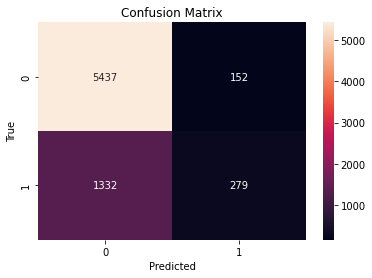

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
pt.title('Confusion Matrix')
pt.xlabel('Predicted')
pt.ylabel('True')
print(classification_report(y_test, y_pred))

ROC CURVE

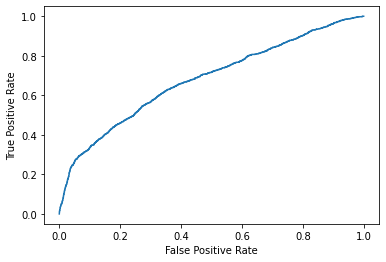

In [ ]:
pt.plot(fpr,tpr)
pt.ylabel('True Positive Rate')
pt.xlabel('False Positive Rate')
pt.show()

AUC 

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)


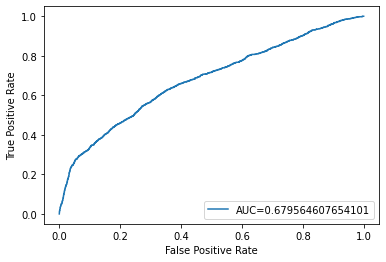

In [ ]:
#create ROC curve
pt.plot(fpr,tpr,label="AUC="+str(auc))
pt.ylabel('True Positive Rate')
pt.xlabel('False Positive Rate')
pt.legend(loc=4)
pt.show()

In [ ]:
from sklearn .model_selection import KFold
model = LogisticRegression()
kfold_validation = KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X_test_normalized, y_test, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.76805556 0.80277778 0.81944444 0.79861111 0.77777778 0.80138889
 0.81111111 0.81527778 0.78194444 0.77638889]
0.7952777777777778


# XGBOOST

In [ ]:
params = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'learning_rate': 1.0,
            'n_estimators':100
        }

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=1.0, max_depth=6)

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning_rate", "max_depth", "AUC_Train", "AUC_Test"])

row = 0

for num_trees in [50, 100]:
  for lr in [0.1, 0.2, 0.3]:
    for num_layers in [3,5,7]:
    
        xgb_clf = XGBClassifier(n_estimators=num_trees, learning_rate=lr, max_depth=num_layers)
        model = xgb_clf.fit(X_train, y_train)

        table.loc[row,"Num Trees"] = num_trees
        table.loc[row,"learning_rate"] = lr
        table.loc[row, 'max_depth'] = num_layers
        table.loc[row,"AUC_Train"] = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
        table.loc[row,"AUC_Test"] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

        row = row + 1

table

,Num Trees,Learning_rate,max_depth,AUC_Train,AUC_Test,learning_rate
0,50,NaN,3,0.732765,0.725005,0.1
1,50,NaN,5,0.761534,0.728017,0.1
2,50,NaN,7,0.810893,0.724514,0.1
3,50,NaN,3,0.748914,0.726756,0.2
4,50,NaN,5,0.791771,0.725178,0.2
5,50,NaN,7,0.852846,0.720037,0.2
6,50,NaN,3,0.761302,0.726328,0.3
7,50,NaN,5,0.812971,0.723534,0.3
8,50,NaN,7,0.88231,0.710928,0.3
9,100,NaN,3,0.749011,0.727578,0.1


K FOLD CROSS VALIDATION FOR TEST DATA

In [ ]:
from sklearn .model_selection import KFold
model = XGBClassifier()
kfold_validation = KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X_test, y_test, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.77638889 0.79722222 0.82083333 0.80416667 0.78055556 0.81111111
 0.81527778 0.81805556 0.77916667 0.78055556]
0.7983333333333333
